<a href="https://colab.research.google.com/github/Elieser1945/DeepLearning/blob/main/LSTM_Model_TensorFlow_Dengan_ReviewTokoBaju_csv_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 LSTM Model TensorFlow Dengan ReviewTokoBaju.csv Dataset**

# Install Library

In [1]:
pip install torch pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

# Import Library

In [2]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt


# Load dataset

In [4]:
file_path = '/content/ReviewTokoBaju.csv'
data = pd.read_csv(file_path)

display(data)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


# Pre Processing

In [5]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text


In [6]:
data['cleaned_review'] = data['Review Text'].apply(lambda x: clean_text(str(x)))


In [7]:
data = data.dropna(subset=['cleaned_review'])


In [8]:
X = data['cleaned_review'].values
y = data['Recommended IND'].values


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [11]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [12]:
max_len = 100  # Set the max length of sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Bangun LSTM Model

In [13]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))  # Embedding layer
model.add(LSTM(64, return_sequences=False))  # LSTM layer with 64 units
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Latih Model

In [16]:
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_data=(X_test_padded, y_test))


Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.8226 - loss: 0.4728 - val_accuracy: 0.8189 - val_loss: 0.4708
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 37s 126ms/step - accuracy: 0.8232 - loss: 0.4616 - val_accuracy: 0.8189 - val_loss: 0.4688
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 40s 122ms/step - accuracy: 0.8217 - loss: 0.4307 - val_accuracy: 0.8178 - val_loss: 0.4706
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 50s 152ms/step - accuracy: 0.8256 - loss: 0.4458 - val_accuracy: 0.8189 - val_loss: 0.4672
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 84s 159ms/step - accuracy: 0.8264 - loss: 0.4427 - val_accuracy: 0.8191 - val_loss: 0.3589
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 73s 127ms/step - accuracy: 0.8232 - loss: 0.3756 - val_accuracy: 0.8293 - val_loss: 0.3393
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.8600 - loss: 0.3000 - val_accuracy: 0.8565 - val_loss: 0.3192
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.8914 - loss: 0

# Evaluasi Model

In [17]:
y_pred = (model.predict(X_test_padded) > 0.5).astype("int32")


147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step


In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


In [19]:
cm = confusion_matrix(y_test, y_pred)


In [20]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")


Accuracy: 0.8831
Precision: 0.9369
Recall: 0.9192
F1 Score: 0.9280
AUC: 0.8197


# Visualisasi

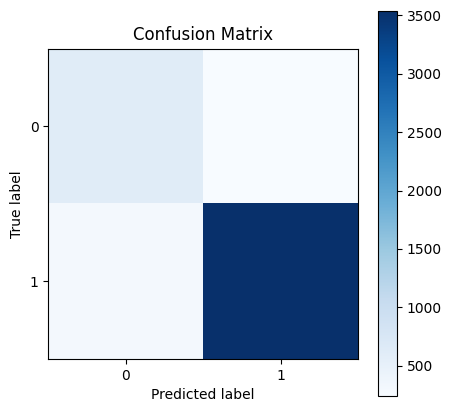

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix")
plt.colorbar(cax)
tick_marks = np.arange(2)
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels([0, 1])
ax.set_yticklabels([0, 1])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


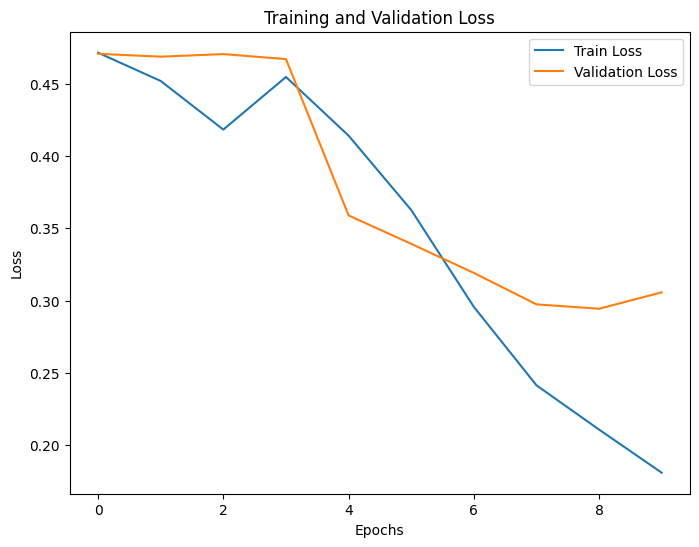

In [22]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


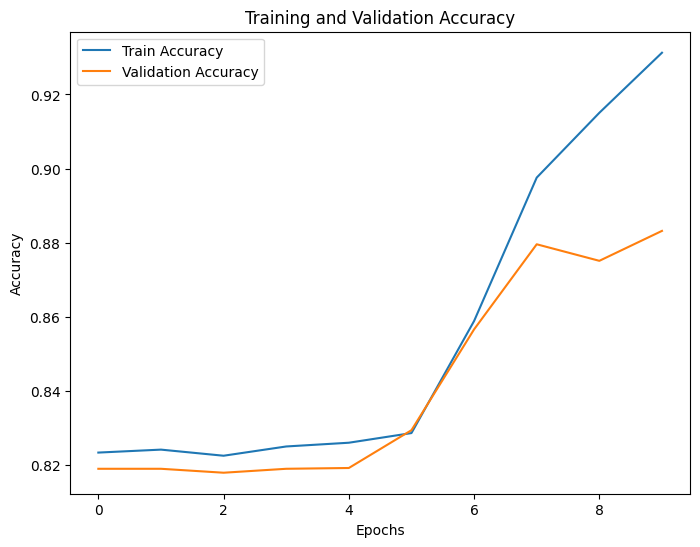

In [23]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
